In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/tested.csv')

In [3]:
df.shape

(418, 12)

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [6]:
# Categorical columns
cat_cols = df.select_dtypes(include=["object", "category"]).columns.tolist()

# Numerical columns
num_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()

print("Categorical Columns:", cat_cols)
print("Numerical Columns:", num_cols)


Categorical Columns: ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
Numerical Columns: ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [8]:
df.isnull().sum()


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1


In [9]:
df.drop(['Cabin'], axis=1, inplace=True)

In [10]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

/tmp/ipython-input-1698716155.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)


In [11]:
# Convert Age from float to integer (rounding)
df["Age"] = df["Age"].round().astype("Int64")


In [12]:
df["Sex"] = df["Sex"].astype("category")

In [13]:
# Remove rows where Fare is null
df = df.dropna(subset=["Fare"])

In [14]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [15]:
df["SibSp"].value_counts()

,count
SibSp,
0,282
1,110
2,14
3,4
4,4
8,2
5,1


In [16]:
df['Survived'] = df['Survived'].astype('category')
df['Pclass'] = df['Pclass'].astype('category')
df['Sex'] = df['Sex'].astype('category')
df['Age'] = df['Age'].astype('category')
df['Embarked'] = df['Embarked'].astype('category')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 417 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  417 non-null    int64   
 1   Survived     417 non-null    category
 2   Pclass       417 non-null    category
 3   Name         417 non-null    object  
 4   Sex          417 non-null    category
 5   Age          417 non-null    category
 6   SibSp        417 non-null    int64   
 7   Parch        417 non-null    int64   
 8   Ticket       417 non-null    object  
 9   Fare         417 non-null    float64 
 10  Embarked     417 non-null    category
dtypes: category(5), float64(1), int64(3), object(2)
memory usage: 27.9+ KB


In [18]:
 df.describe()


,PassengerId,SibSp,Parch,Fare
count,417.000000,417.000000,417.000000,417.000000
mean,1100.635492,0.448441,0.393285,35.627188
std,120.923774,0.897568,0.982419,55.907576
min,892.000000,0.000000,0.000000,0.000000
25%,996.000000,0.000000,0.000000,7.895800
50%,1101.000000,0.000000,0.000000,14.454200
75%,1205.000000,1.000000,0.000000,31.500000
max,1309.000000,8.000000,9.000000,512.329200


Survived
0    265
1    152
Name: count, dtype: int64

Survival Percentage:
Survived
0    63.549161
1    36.450839
Name: proportion, dtype: float64


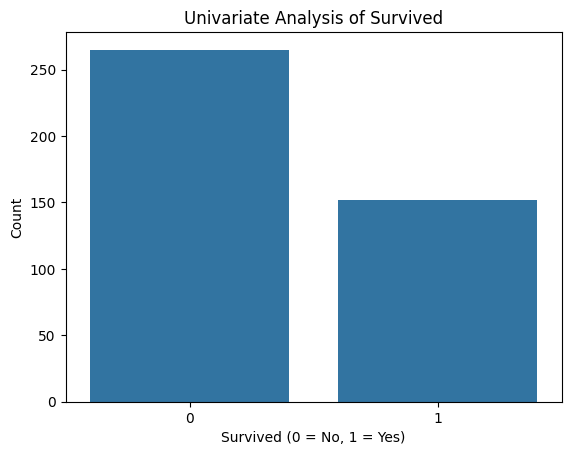

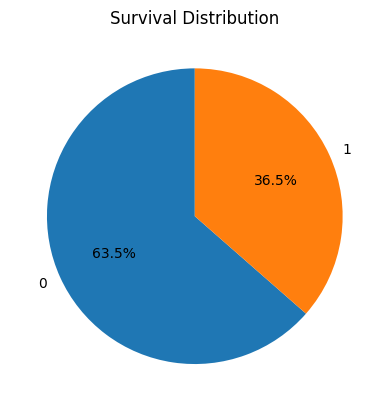

In [19]:
print(df["Survived"].value_counts())

# -------------------------------
# 2. Percentage Distribution
# -------------------------------
print("\nSurvival Percentage:")
print(df["Survived"].value_counts(normalize=True) * 100)

# -------------------------------
# 3. Bar Chart
# -------------------------------
sns.countplot(x="Survived", data=df)
plt.title("Univariate Analysis of Survived")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

# -------------------------------
# 4. Pie Chart
# -------------------------------
df["Survived"].value_counts().plot(
    kind="pie",
    autopct="%1.1f%%",
    startangle=90
)
plt.title("Survival Distribution")
plt.ylabel("")
plt.show()

Pclass Value Counts:
Pclass
1    107
2     93
3    217
Name: count, dtype: int64

Pclass Percentage Distribution:
Pclass
1    25.659472
2    22.302158
3    52.038369
Name: proportion, dtype: float64


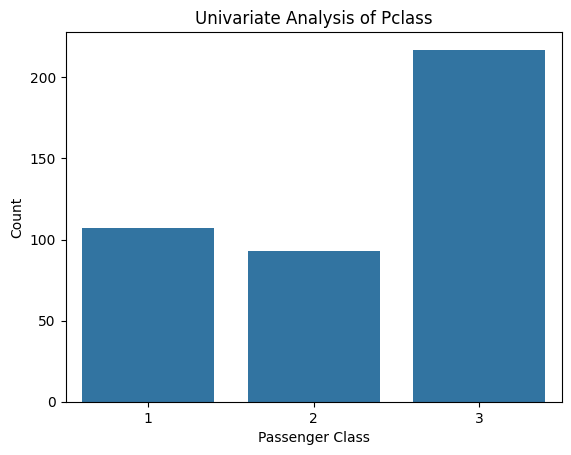

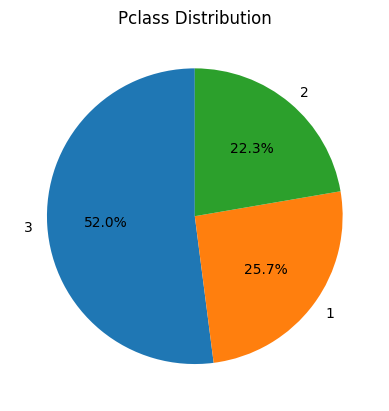

In [20]:
print("Pclass Value Counts:")
print(df["Pclass"].value_counts().sort_index())

# -------------------------------
# 2. Percentage Distribution
# -------------------------------
print("\nPclass Percentage Distribution:")
print(df["Pclass"].value_counts(normalize=True).sort_index() * 100)

# -------------------------------
# 3. Bar Chart
# -------------------------------
sns.countplot(x="Pclass", data=df)
plt.title("Univariate Analysis of Pclass")
plt.xlabel("Passenger Class")
plt.ylabel("Count")
plt.show()

# -------------------------------
# 4. Pie Chart
# -------------------------------
df["Pclass"].value_counts().plot(
    kind="pie",
    autopct="%1.1f%%",
    startangle=90
)
plt.title("Pclass Distribution")
plt.ylabel("")
plt.show()

Sex
male      63.549161
female    36.450839
Name: proportion, dtype: float64


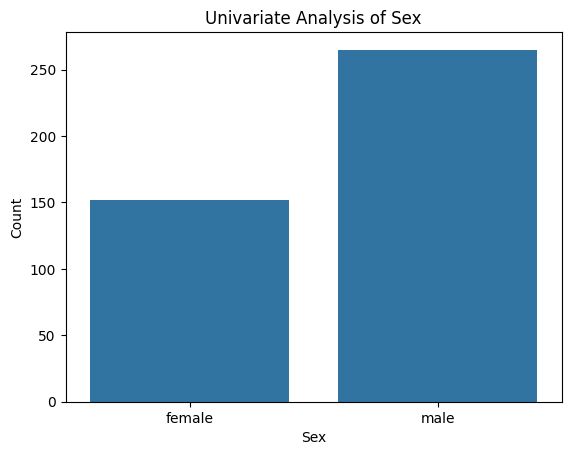

In [21]:
# Percentage distribution of Sex
print((df["Sex"].value_counts(normalize=True)) * 100)

# Count plot
sns.countplot(x="Sex", data=df)
plt.title("Univariate Analysis of Sex")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()

SibSp Value Counts:
SibSp
0    282
1    110
2     14
3      4
4      4
5      1
8      2
Name: count, dtype: int64

SibSp Percentage Distribution:
SibSp
0    67.625899
1    26.378897
2     3.357314
3     0.959233
4     0.959233
5     0.239808
8     0.479616
Name: proportion, dtype: float64


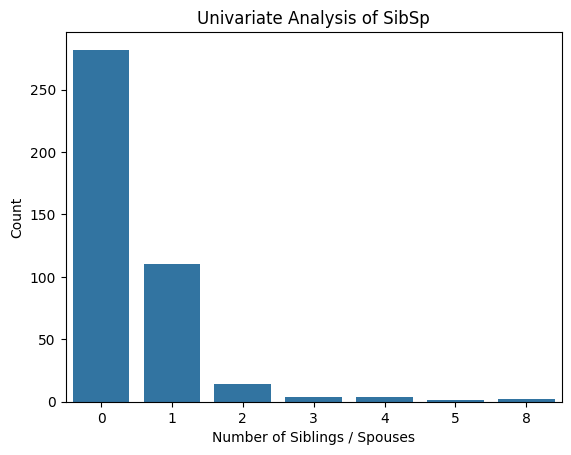

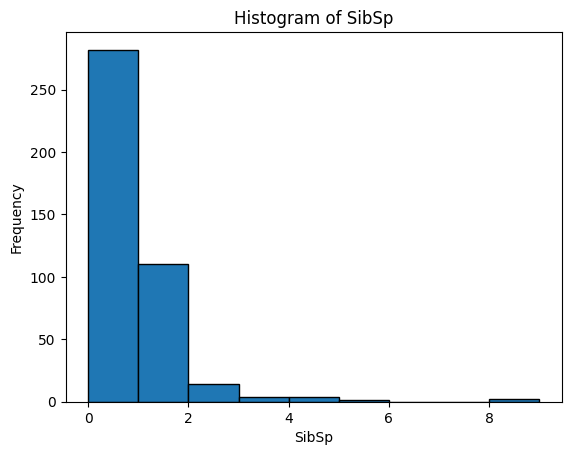

In [22]:
print("SibSp Value Counts:")
print(df["SibSp"].value_counts().sort_index())

# -------------------------------
# 2. Percentage Distribution
# -------------------------------
print("\nSibSp Percentage Distribution:")
print(df["SibSp"].value_counts(normalize=True).sort_index() * 100)

# -------------------------------
# 3. Bar Chart
# -------------------------------
sns.countplot(x="SibSp", data=df)
plt.title("Univariate Analysis of SibSp")
plt.xlabel("Number of Siblings / Spouses")
plt.ylabel("Count")
plt.show()

# -------------------------------
# 4. Optional: Histogram
# -------------------------------
plt.hist(df["SibSp"], bins=range(df["SibSp"].max() + 2), edgecolor="black")
plt.title("Histogram of SibSp")
plt.xlabel("SibSp")
plt.ylabel("Frequency")
plt.show()

Parch
0    77.272727
1    12.440191
2     7.894737
3     0.717703
4     0.478469
9     0.478469
6     0.239234
5     0.239234
Name: count, dtype: float64


<Axes: ylabel='count'>

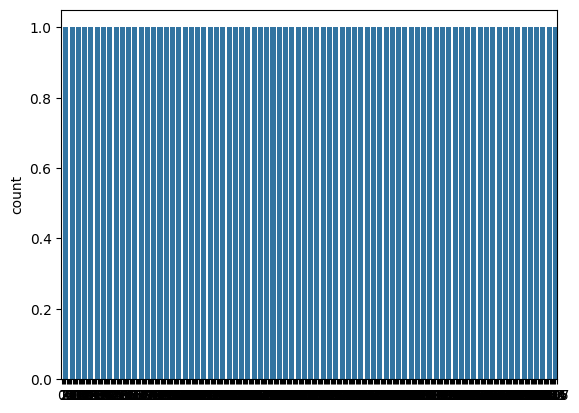

In [23]:
print(df['Parch'].value_counts()/418*100)

sns.countplot(df['Parch'])

Embarked
S    64.354067
C    24.401914
Q    11.004785
Name: count, dtype: float64


<Axes: xlabel='count', ylabel='Embarked'>

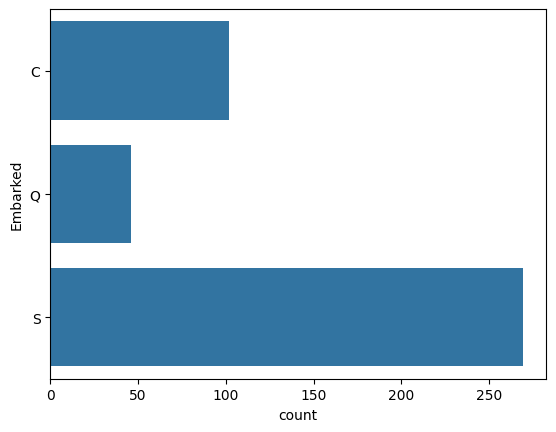

In [24]:
print(df['Embarked'].value_counts()/418*100)

sns.countplot(df['Embarked'])

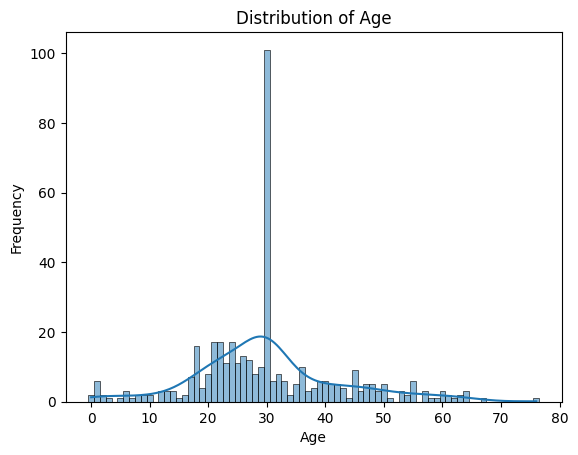

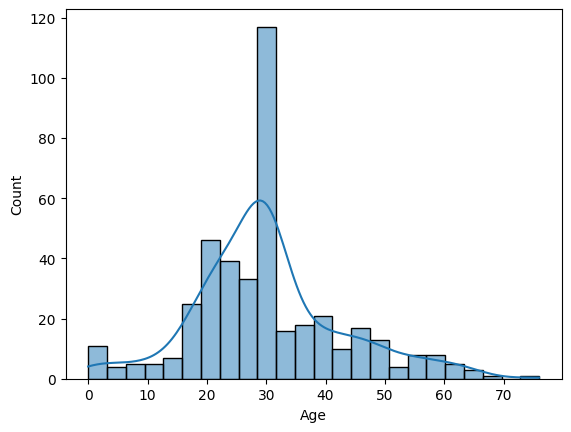

Skewness: 0.5220726874988769
Kurtosis: 0.9235864381726602


In [25]:


# Histogram with KDE
sns.histplot(df["Age"], kde=True)
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

df["Age"] = pd.to_numeric(df["Age"], errors="coerce")

sns.histplot(df["Age"], kde=True)
plt.show()

print("Skewness:", df["Age"].skew())
print("Kurtosis:", df["Age"].kurt())



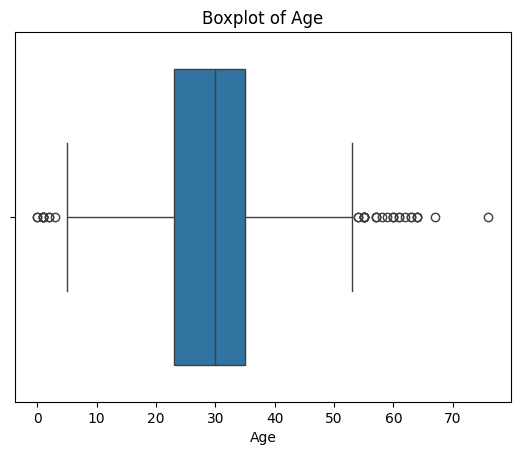

In [26]:
sns.boxplot(x=df["Age"])
plt.title("Boxplot of Age")
plt.xlabel("Age")
plt.show()

In [27]:
print("People with age smaller than 60 are", df[(df["Age"] < 60)].shape[0])
print("People with age in between 60 and 70 are", df[(df["Age"] >= 60) & (df["Age"] <= 70)].shape[0])
print("People with age in between 70 and 75 are", df[(df["Age"] >= 70) & (df["Age"] <= 75)].shape[0])
print("People with age greater than 75 are", df[(df["Age"] > 75)].shape[0])

print('-'*50)

print("People with age in between 0 and 1", df[df['Age']<1].shape[0])

People with age smaller than 60 are 404
People with age in between 60 and 70 are 12
People with age in between 70 and 75 are 0
People with age greater than 75 are 1
--------------------------------------------------
People with age in between 0 and 1 2


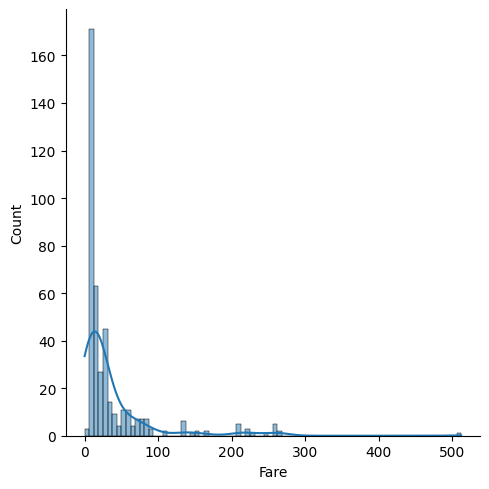

In [28]:
# Fare Column

sns.displot(df["Fare"], kde=True)

In [29]:
print(df['Fare'].skew())
print(df['Fare'].kurt())

3.6872133081121405
17.921595257735987


<Axes: xlabel='Fare'>

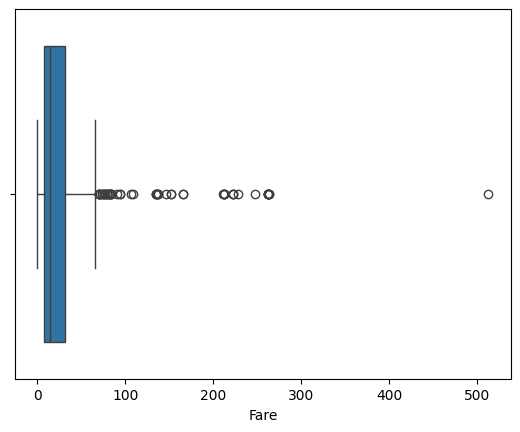

In [30]:
sns.boxplot(x=df["Fare"])

In [31]:
print("People with fare in between $200 and $300 are", df[(df["Fare"] >= 200) & (df["Fare"] <= 300)].shape[0])
print("People with fare grater than $300 are", df[(df["Fare"] > 300)].shape[0])

People with fare in between $200 and $300 are 17
People with fare grater than $300 are 1


Survived,0,1
Pclass,,
1,53.271028,46.728972
2,67.741935,32.258065
3,66.820276,33.179724


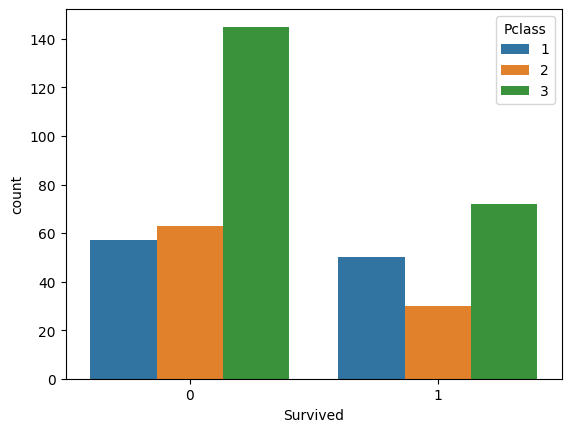

In [32]:
#Multivariate Analysis

#Survival with Pclass

sns.countplot(x='Survived', hue='Pclass', data=df)

pd.crosstab(df['Pclass'], df['Survived']).apply(lambda r: r/r.sum()*100, axis=1)

Survived,0,1
Sex,,
female,0.0,100.0
male,100.0,0.0


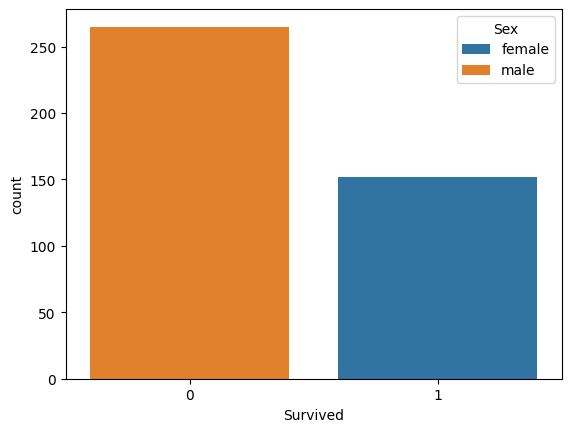

In [33]:
#Survival with Sex

sns.countplot(x='Survived', hue='Sex', data=df)

pd.crosstab(df['Sex'], df['Survived']).apply(lambda r: r/r.sum()*100, axis=1)

Survived,0,1
Embarked,,
C,60.784314,39.215686
Q,47.826087,52.173913
S,67.286245,32.713755


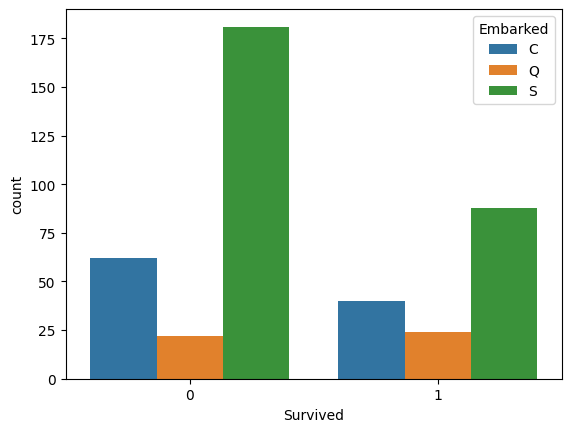

In [34]:
 #Survival with Embarked

sns.countplot(x='Survived', hue='Embarked', data=df)

pd.crosstab(df['Embarked'], df['Survived']).apply(lambda r: r/r.sum()*100, axis=1)

/tmp/ipython-input-1145207410.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Survived']==0]['Age'])
/tmp/ipython-input-1145207410.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Survived']==1]['Age'])


<Axes: xlabel='Age', ylabel='Density'>

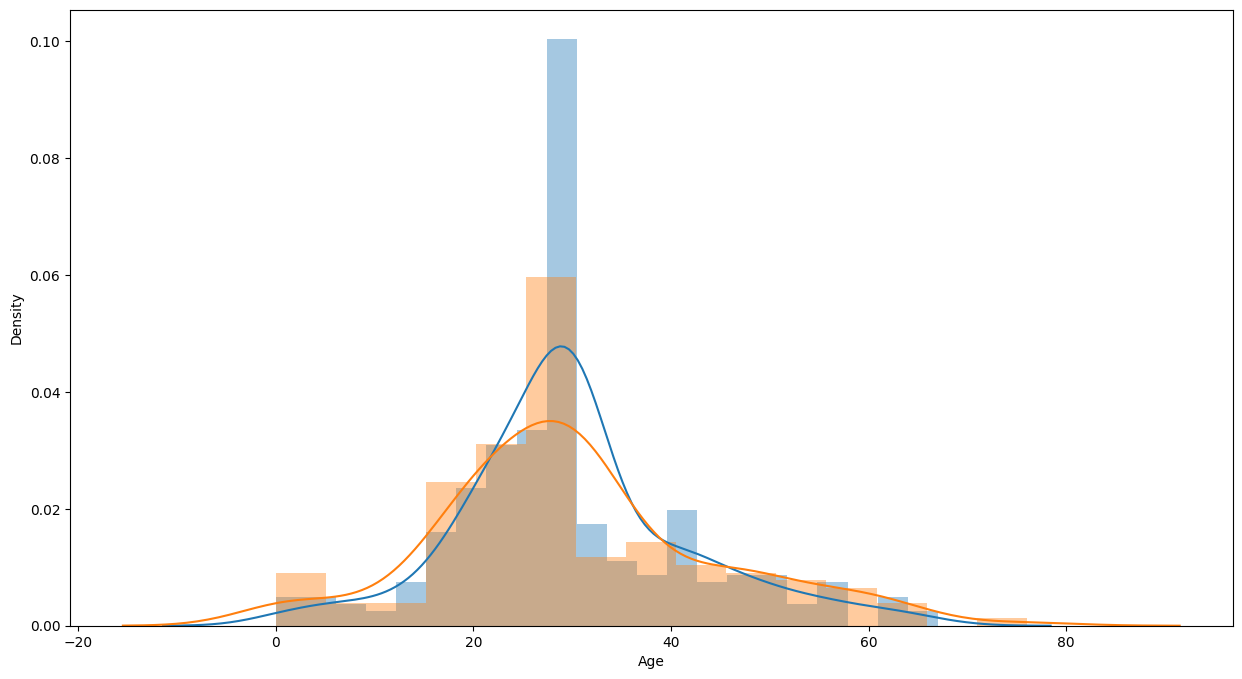

In [35]:
 #Survived with Age

 plt.figure(figsize=(15,8))
 sns.distplot(df[df['Survived']==0]['Age'])
 sns.distplot(df[df['Survived']==1]['Age'])

/tmp/ipython-input-1392711689.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Survived']==0]['Fare'])
/tmp/ipython-input-1392711689.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Survived']==1]['Fare'])


<Axes: xlabel='Fare', ylabel='Density'>

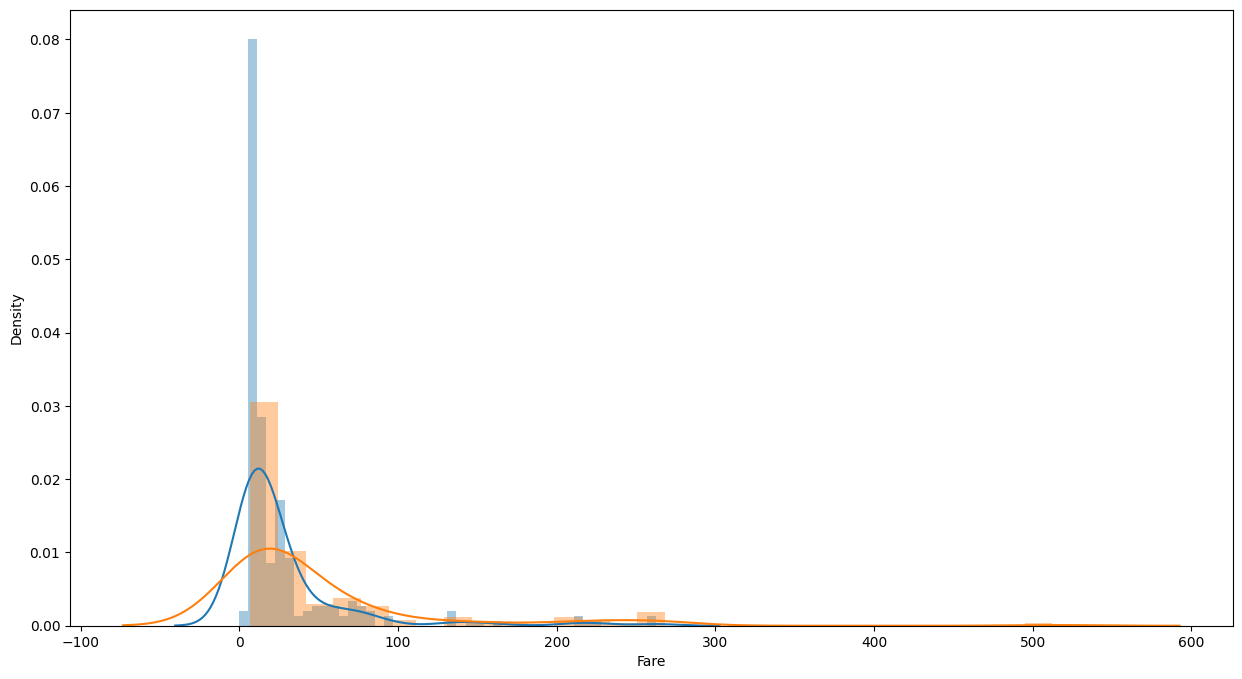

In [36]:
 #Survived with Fare

 plt.figure(figsize=(15,8))
 sns.distplot(df[df['Survived']==0]['Fare'])
 sns.distplot(df[df['Survived']==1]['Fare'])

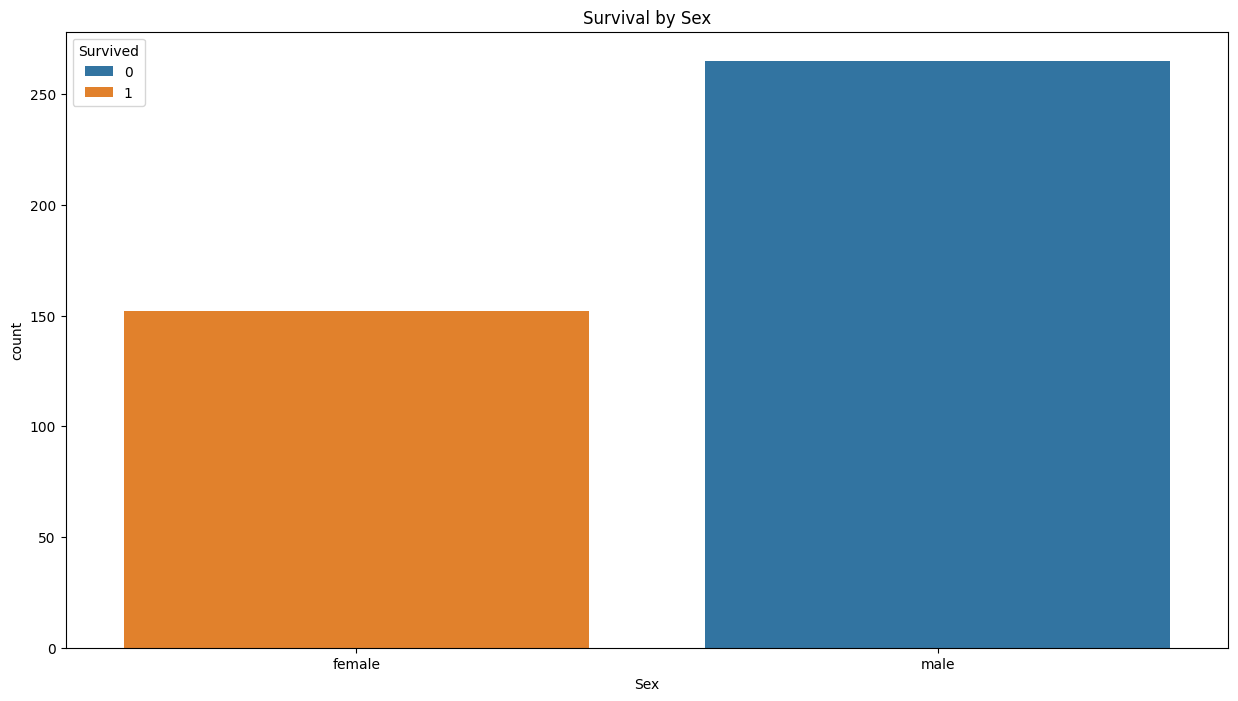

In [37]:
 #Survived with Sex

 plt.figure(figsize=(15,8))
 sns.countplot(x='Sex', hue='Survived', data=df)
 plt.title('Survival by Sex')
 plt.show()

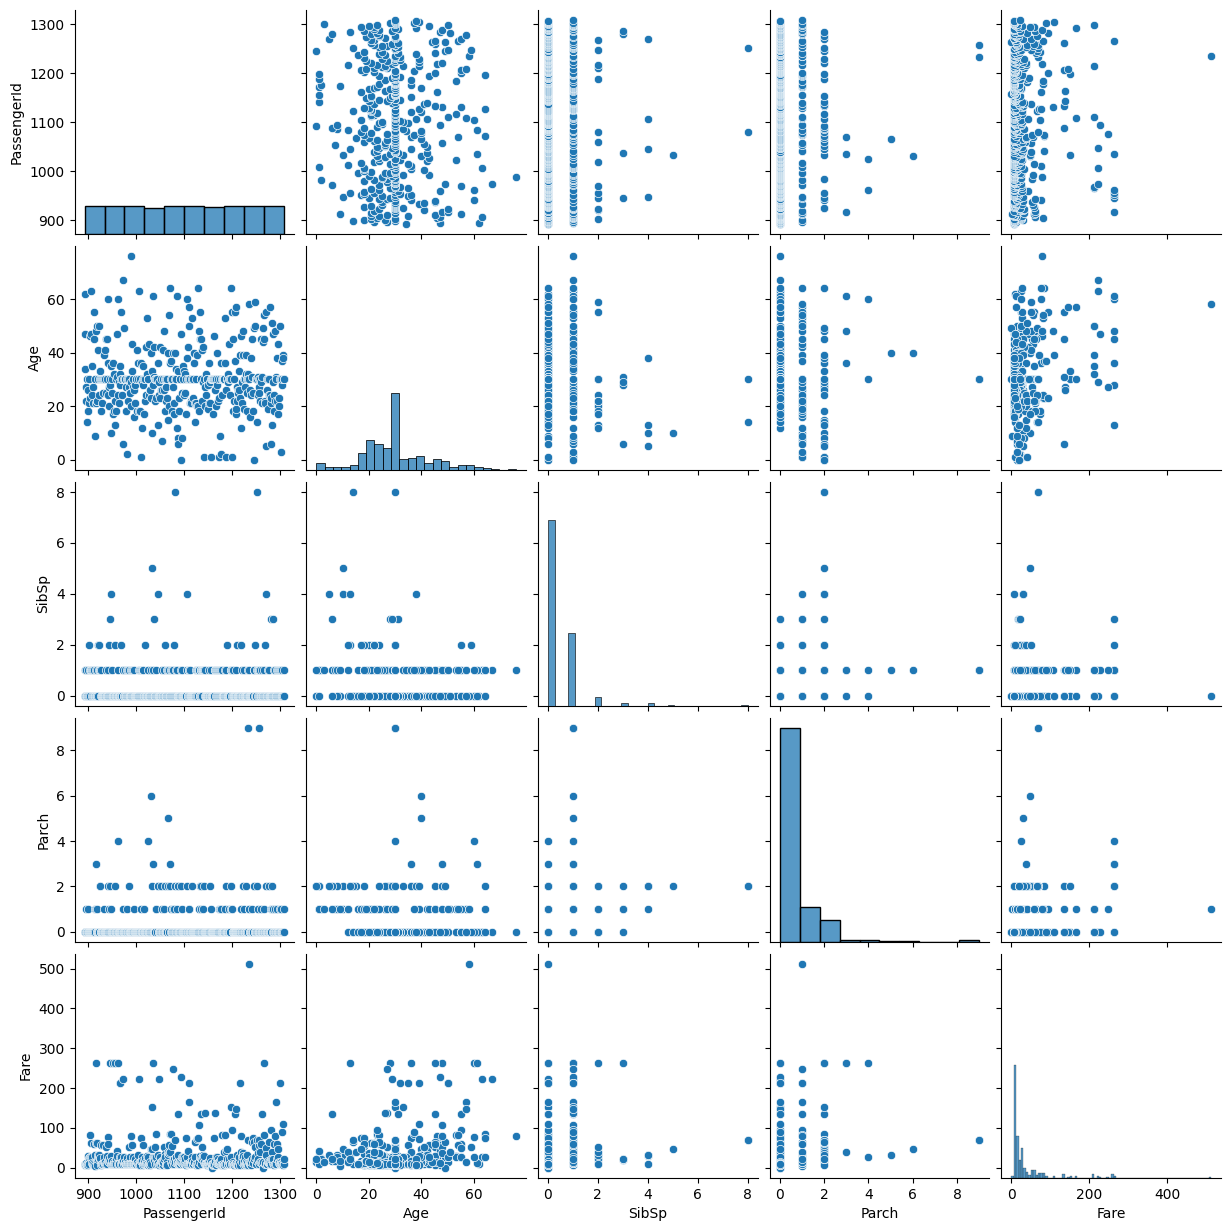

In [38]:
sns.pairplot(df)

<Axes: >

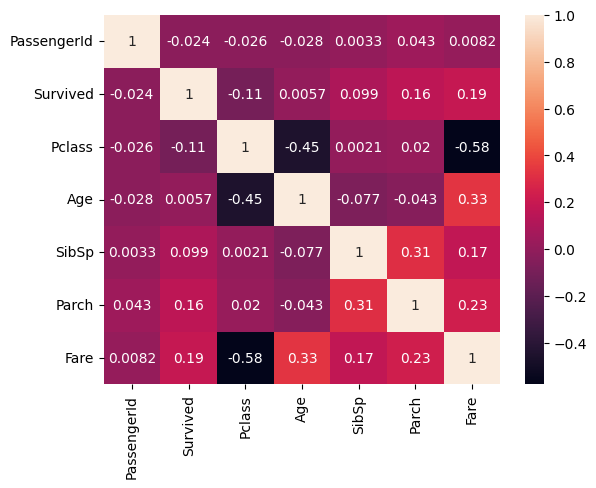

In [39]:
# Create a temporary copy to work with for correlation calculation
temp_df = df.copy()

# Convert categorical columns with numerical meaning to int
temp_df['Survived'] = temp_df['Survived'].astype(int)
temp_df['Pclass'] = temp_df['Pclass'].astype(int)
temp_df['Age'] = temp_df['Age'].astype(int)

# Calculate correlation matrix only for numeric columns
correlation_matrix = temp_df.select_dtypes(include=np.number).corr()

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True)

In [40]:
# Feature Engineering

# We will create a new column by the name of family which will be the sum of SibSp and Parch Cols

df['Family_Size'] = df['SibSp'] + df['Parch']

In [41]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family_Size
403,1295,0,1,"Carrau, Mr. Jose Pedro",male,17,0,0,113059,47.1000,S,0
25,917,0,3,"Robins, Mr. Alexander A",male,50,1,0,A/5. 3337,14.5000,S,1
366,1258,0,3,"Caram, Mr. Joseph",male,30,1,0,2689,14.4583,C,1
281,1173,0,3,"Peacock, Master. Alfred Edward",male,1,1,1,SOTON/O.Q. 3101315,13.7750,S,2
286,1178,0,3,"Franklin, Mr. Charles (Charles Fardon)",male,30,0,0,SOTON/O.Q. 3101314,7.2500,S,0


In [42]:
# Now we will engineer a new feature by the name of family type

def family_type(number):
  if number==0:
    return "Alone"
  elif number>0 and number <=4:
    return "Medium"
  else:
    return "Large"

In [43]:
df['Family_type']=df['Family_Size'].apply(family_type)

In [44]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family_Size,Family_type
200,1092,1,3,"Murphy, Miss. Nora",female,30,0,0,36568,15.5000,Q,0,Alone
151,1043,0,3,"Matinoff, Mr. Nicola",male,30,0,0,349255,7.8958,C,0,Alone
291,1183,1,3,"Daly, Miss. Margaret Marcella Maggie""""",female,30,0,0,382650,6.9500,Q,0,Alone
416,1308,0,3,"Ware, Mr. Frederick",male,30,0,0,359309,8.0500,S,0,Alone
70,962,1,3,"Mulvihill, Miss. Bertha E",female,24,0,0,382653,7.7500,Q,0,Alone


In [45]:
pd.crosstab(df['Family_type'], df['Survived']).apply(lambda r: r/r.sum()*100, axis=1)

Survived,0,1
Family_type,,
Alone,73.015873,26.984127
Large,53.846154,46.153846
Medium,48.684211,51.315789


# **Detecting Outlier**

In [46]:
 # Handling Outlier in Age

 df=df[df['Age']<(df['Age'].mean()+3*df['Age'].std())]
 df.shape

(416, 13)

In [53]:
# Handling Outlier from Fare Column

# Finding Quartiles

Q1=df['Fare'].quantile(0.25)
Q3=df['Fare'].quantile(0.75)
IQR=Q3-Q1

# Finding Outlier

In [54]:
# One-Hot Encoding with numeric output
df_encoded = pd.get_dummies(
    df,
    columns=["Pclass", "Sex", "Embarked", "Family_type"],
    drop_first=True,
    dtype=int
)

df_encoded.head()


,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Family_Size,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Family_type_Large,Family_type_Medium
0,892,0,"Kelly, Mr. James",34,0,0,330911,7.8292,0,0,1,1,1,0,0,0
1,893,1,"Wilkes, Mrs. James (Ellen Needs)",47,1,0,363272,7.0000,1,0,1,0,0,1,0,1
2,894,0,"Myles, Mr. Thomas Francis",62,0,0,240276,9.6875,0,1,0,1,1,0,0,0
3,895,0,"Wirz, Mr. Albert",27,0,0,315154,8.6625,0,0,1,1,0,1,0,0
4,896,1,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22,1,1,3101298,12.2875,2,0,1,0,0,1,0,1


In [51]:
display(df_encoded.head())

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Family_Size,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Family_type_Large,Family_type_Medium
0,892,0,"Kelly, Mr. James",34,0,0,330911,7.8292,0,0,1,1,1,0,0,0
1,893,1,"Wilkes, Mrs. James (Ellen Needs)",47,1,0,363272,7.0000,1,0,1,0,0,1,0,1
2,894,0,"Myles, Mr. Thomas Francis",62,0,0,240276,9.6875,0,1,0,1,1,0,0,0
3,895,0,"Wirz, Mr. Albert",27,0,0,315154,8.6625,0,0,1,1,0,1,0,0
4,896,1,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22,1,1,3101298,12.2875,2,0,1,0,0,1,0,1


In [56]:
df=pd.get_dummies(df, columns=['Pclass', 'Sex', 'Embarked', 'Family_type'], drop_first=True)

<Axes: >

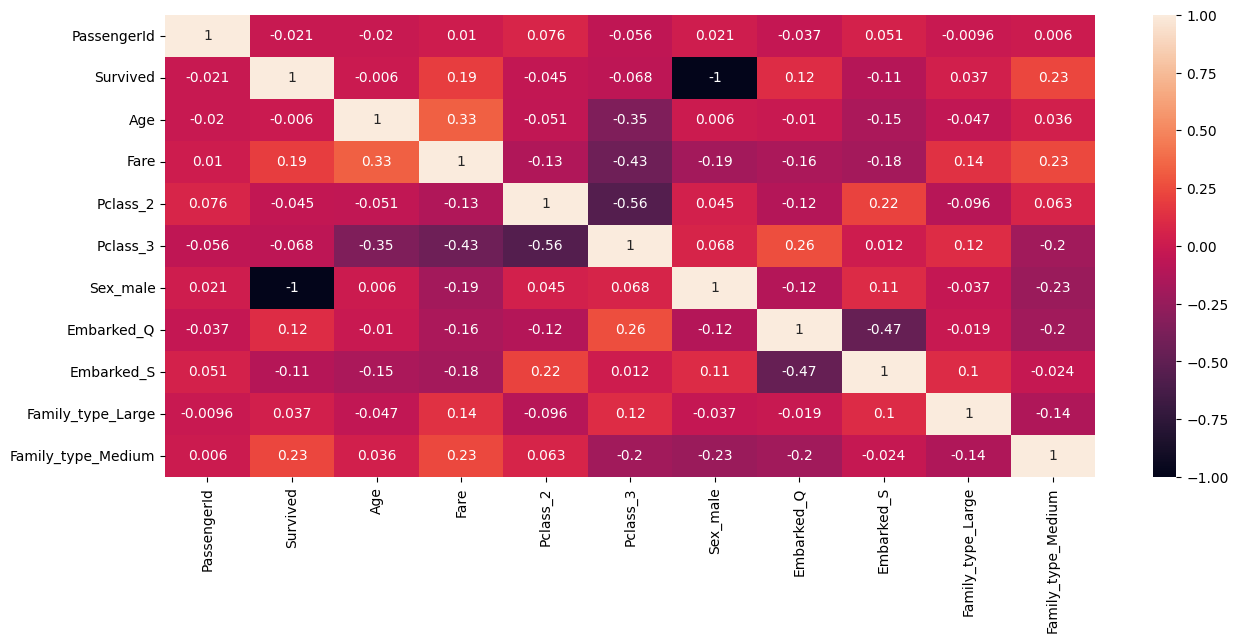

In [58]:
plt.figure(figsize=(15,6))
sns.heatmap(df_encoded.corr(), annot=True)

<Axes: >

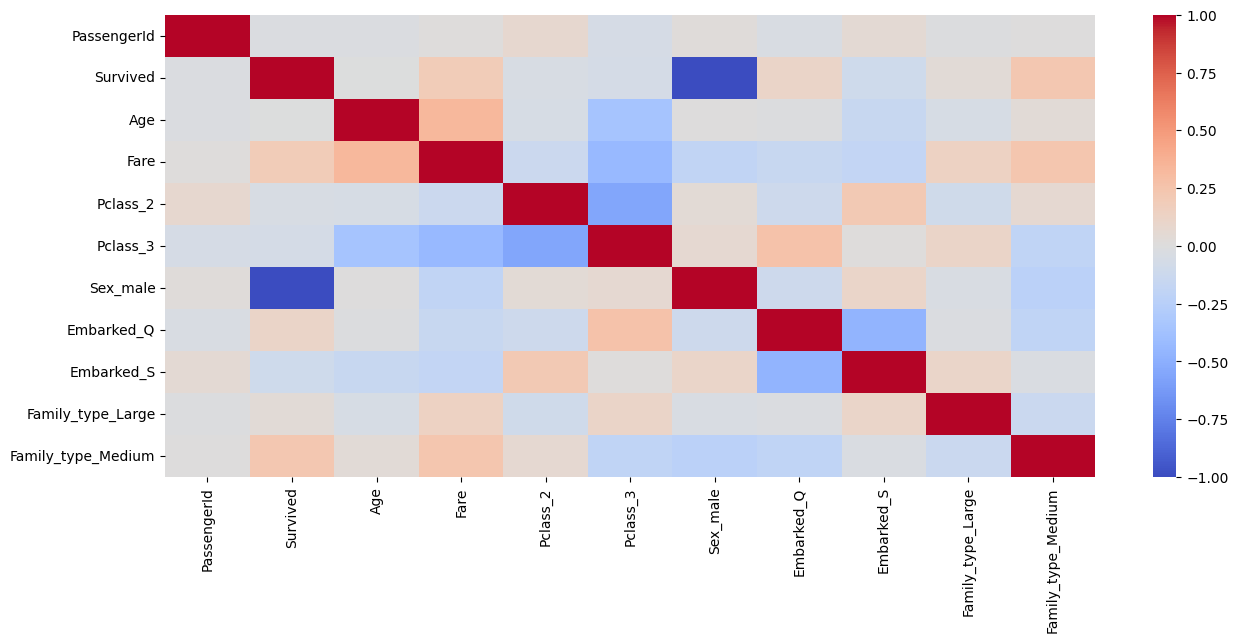

In [60]:
plt.figure(figsize=(15,6))
sns.heatmap(df_encoded.corr(), cmap='coolwarm')

## Drawing **Conclusion**

- chance of female survival is higher than the male survival

- Travelling in Pclass 3 was deadliest

- Somehow, people going to C survived more

- People in the age range of 20 to 40 had a higher chance of not surviving

- People travelling with smaller families had a higher chance of surviving the accident in comparison to people with large families and travelling alone